# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# **Load Dataset**

In [2]:
data=pd.read_csv("/content/train.csv")

# **Explore Dataset**

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.shape

(1460, 81)

In [7]:
data.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


# **Categorical & Numerical Columns**

In [8]:
numerical_column=data.select_dtypes(include=['int64','float64']).columns
categorical_columns=data.select_dtypes(include=['object']).columns
print("Numerical Columns \n",numerical_column,"\n")
print("Categorical Columns \n",categorical_columns)

Numerical Columns 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 

Categorical Columns 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFi

# **Missing & Duplicate Values**

In [9]:
missing_values=data.isnull().sum()/len(data)*100
missing_values=missing_values[missing_values>0]
missing_values.sort_values(ascending=False,inplace=True)
missing_values

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [10]:
#missing values in numerical column
numerical_missing_values=data[numerical_column].isnull().sum()
numerical_missing_values=numerical_missing_values[numerical_missing_values>0]
numerical_missing_values.sort_values(ascending=False,inplace=True)
numerical_missing_values

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


In [11]:
#missing values in categorical columns
categorical_missing_values=data[categorical_columns].isnull().sum()
categorical_missing_values=categorical_missing_values[categorical_missing_values>0]
categorical_missing_values.sort_values(ascending=False,inplace=True)
categorical_missing_values

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
GarageFinish,81
GarageQual,81
GarageType,81
GarageCond,81


In [12]:
#duplicate values
duplicate_values=data.duplicated().sum()
duplicate_values

np.int64(0)

# **Impute missing values**

In [13]:
#num_col=['LotFrontage','GarageYrBlt','MasVnrArea']
num_col=numerical_missing_values
cat_col=categorical_missing_values

In [14]:
knn_imputer=KNNImputer(n_neighbors=5)
data[num_col.index]=knn_imputer.fit_transform(data[num_col.index])

In [15]:
imputer = SimpleImputer(strategy='most_frequent')
data[cat_col.index] = imputer.fit_transform(data[cat_col.index])

In [16]:
#again check missing values
missing_values=data.isnull().sum()/len(data)*100
missing_values=missing_values[missing_values>0]
missing_values.sort_values(ascending=False,inplace=True)
missing_values

,0


# **Distribution**

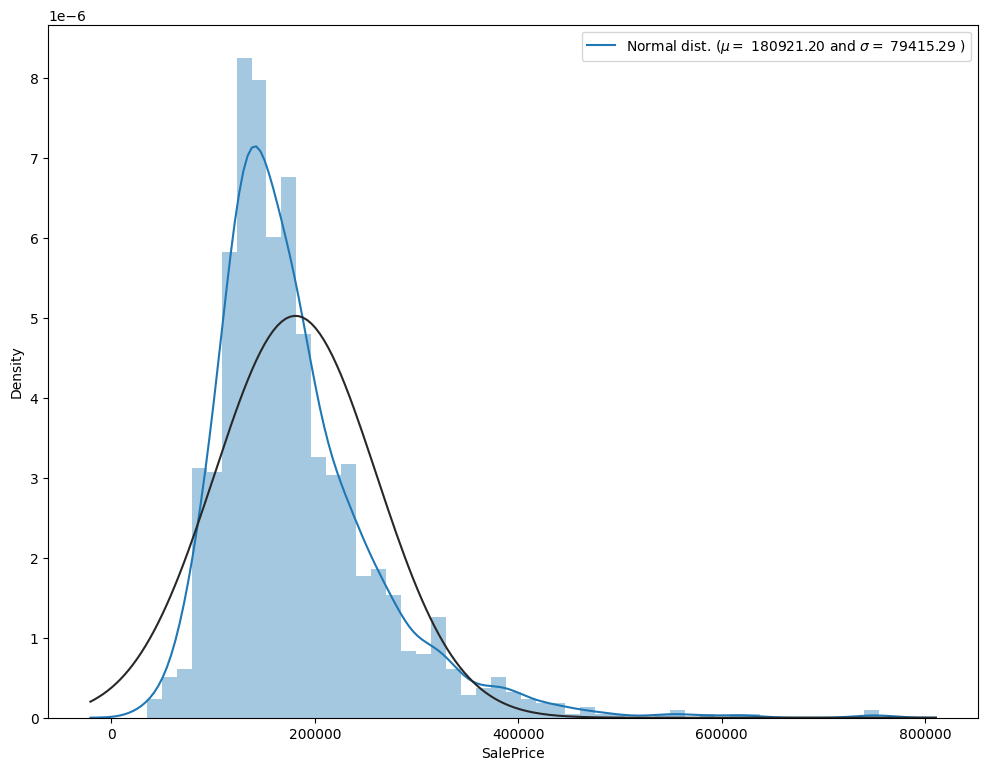

In [17]:
plt.subplots(figsize=(12,9))
sns.distplot(data['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(data['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel=("Frequency")

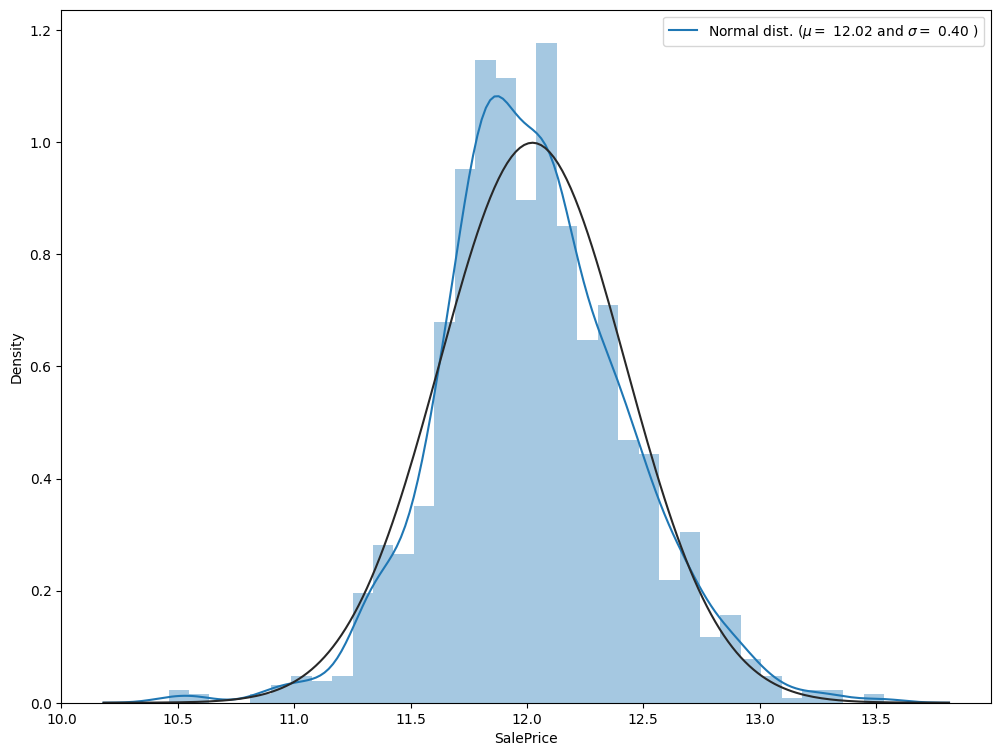

In [18]:
#normalize distribution
data['SalePrice'] = np.log(data['SalePrice'])
plt.subplots(figsize=(12,9))
sns.distplot(data['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(data['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel=("Frequency")

# **Label Encoding**

In [19]:
#encode categorical column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# **Standard Scaler**

In [20]:
x=data.drop(['Id','SalePrice'], axis=1).values
y=data['SalePrice'].values
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# **Reduce Dimensions(PCA)**

In [21]:
pca=PCA(n_components=0.95)
x_pca=pca.fit_transform(x_scaled)

In [23]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

# **Models**

* Linear Regression
* Random Forest Regressor
* Gradient Boosting Regressor

In [24]:
#model linearregression,randomforestregressor,gradientbostingregressor
models={
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()
}
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + " Trained.")

LinearRegression Trained.
RandomForestRegressor Trained.
GradientBoostingRegressor Trained.


In [25]:
for name,model in models.items():
  print(name + " Accuracy: {:.2f}%".format(model.score(X_test,y_test)*100))

LinearRegression Accuracy: 83.18%
RandomForestRegressor Accuracy: 81.96%
GradientBoostingRegressor Accuracy: 83.82%


In [26]:
for name, model in models.items():
  predictions = model.predict(X_test[[150]])
  print(f"Predictions for {name}:")
  print("Prediction of Model : ",predictions)  # Print predictions for the current model
  print("Real Values : ",y_test[150])

Predictions for LinearRegression:
Prediction of Model :  [12.18189477]
Real Values :  12.323411137947407
Predictions for RandomForestRegressor:
Prediction of Model :  [12.19552607]
Real Values :  12.323411137947407
Predictions for GradientBoostingRegressor:
Prediction of Model :  [12.16101013]
Real Values :  12.323411137947407
